In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print("Numerical features :", numerical_features)
print("Categorical features :", categorical_features)

Numerical features : ['age', 'bmi', 'children', 'charges']
Categorical features : ['sex', 'smoker', 'region']


In [15]:
# Adding age ranges
# 0-30 -> young, 30-60 -> mid, 60-100 -> old

df['age_range'] = 'young'
df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age_range'] = 'mid'
df.loc[(df['age'] > 60), 'age_range'] = 'old'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,mid
4,32,male,28.880,0,no,northwest,3866.85520,mid


In [16]:
# Bmi ranges
# bmi < 18.5 -> underweight, 18.5-24.9 -> normal, 25.0-29.9 -> overweight, >30.0 -> obese

df['bmi_range'] = 'underweight'
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] < 25.0), 'bmi_range'] = 'normal'
df.loc[(df['bmi'] >= 25.0) & (df['bmi'] < 30.0), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] >= 30.0), 'bmi_range'] = 'obese'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,mid,normal
4,32,male,28.880,0,no,northwest,3866.85520,mid,overweight


In [17]:
df.value_counts(['sex'])

sex   
male      675
female    662
Name: count, dtype: int64

In [19]:
df.value_counts(['sex', 'age_range'])

sex     age_range
male    mid          402
female  mid          401
male    young        229
female  young        214
        old           47
male    old           44
Name: count, dtype: int64

In [20]:
df.value_counts(['region'])

region   
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64

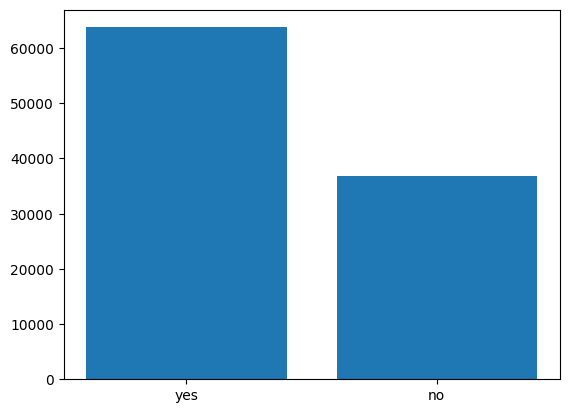

In [22]:
plt.bar(df['smoker'], df['charges'])
plt.show()


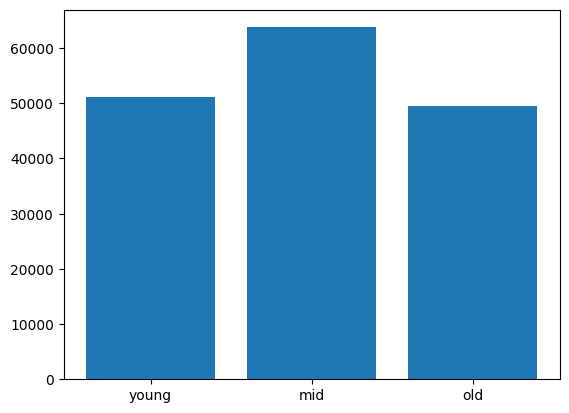

In [23]:
plt.bar(df['age_range'], df['charges'])
plt.show()

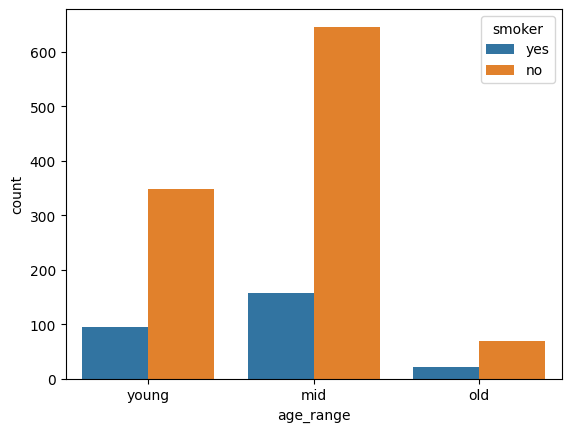

In [25]:
sns.countplot(data=df, x='age_range', hue='smoker')
plt.show()

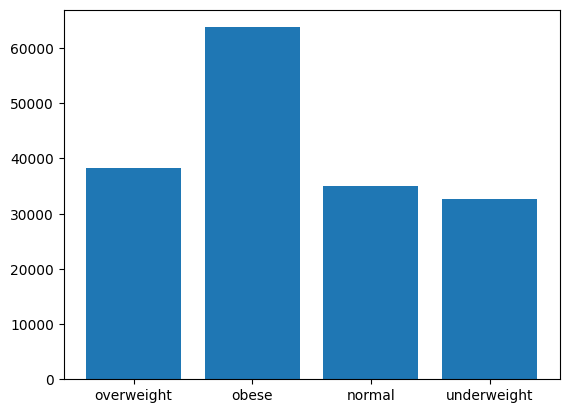

In [26]:
plt.bar(df['bmi_range'], df['charges'])
plt.show()

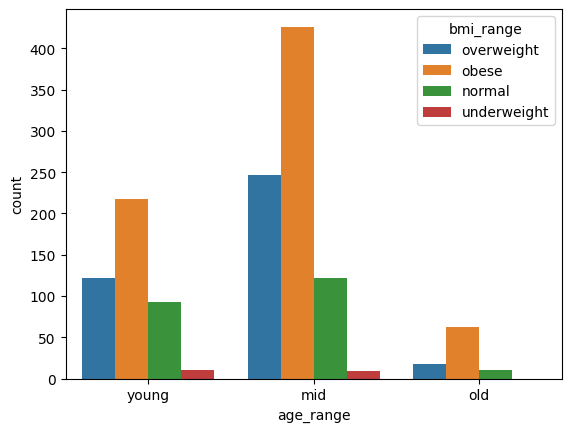

In [27]:
sns.countplot(data=df, x='age_range', hue='bmi_range')
plt.show()

In [28]:
df.value_counts(['age_range'])

age_range
mid          803
young        443
old           91
Name: count, dtype: int64

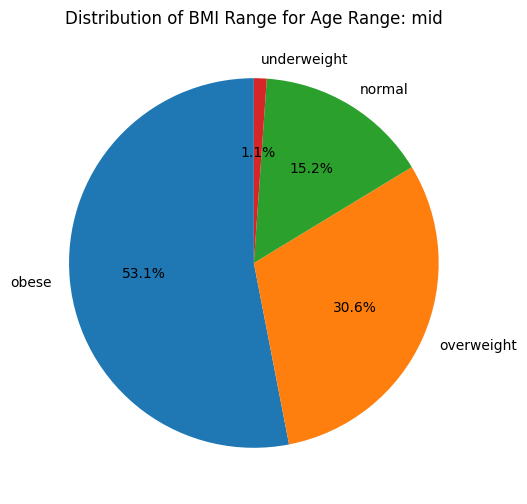

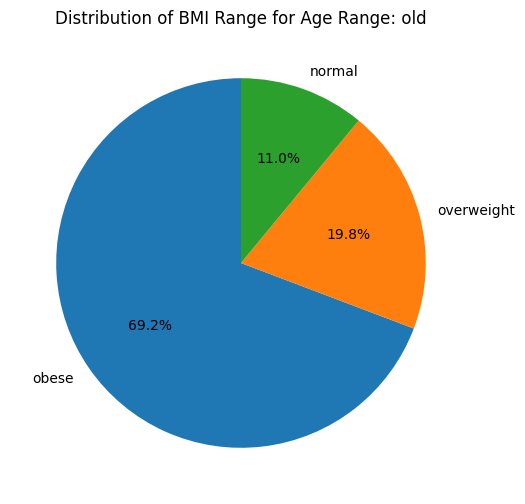

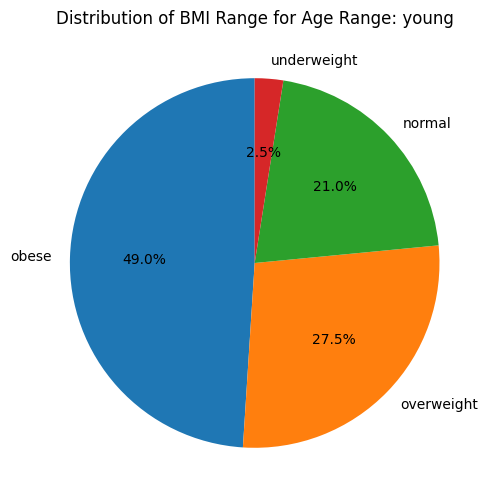

In [29]:
diff_ages = df.groupby('age_range')

for age_range, group in diff_ages:
    bmi_counts = group['bmi_range'].value_counts()
    
    plt.figure(figsize=(6,6))
    plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of BMI Range for Age Range: {age_range}')
    plt.show()

## Conclusions

